# Assignment III.
### *Stochastic Simulation*
#### Group 6
- Marcell Szegedi - 15722635
- Yuxin Dong - 15550397
- Koen Verlaan - 11848316

**Git Repository**: https://github.com/MarcellSzegedi/Stochastic_Simulation_Assignments.git

---
**Import Libraries**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [51]:
# Read TSPLIB format files and returns the coordinates as a numpy array
def read_tsp(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    coords_start = lines.index('NODE_COORD_SECTION\n') + 1
    coords_end = lines.index('EOF\n')
    coords = []
    for line in lines[coords_start:coords_end]:
        _, x, y = line.split()
        coords.append((float(x), float(y)))
    return np.array(coords)


In [52]:
# Function to compute the distance matrix based on Euclidean distance
def compute_distance_matrix(coords):
    n = len(coords)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])
    return dist_matrix

# Function to calculate total distance of a tour
def total_distance(tour, dist_matrix):
    return sum(dist_matrix[tour[i], tour[i + 1]] for i in range(len(tour) - 1)) + dist_matrix[tour[-1], tour[0]]

In [53]:
# Simulated Annealing implementation to solve TSP
def simulated_annealing(coords, initial_temp, cooling_rate, max_iterations, markov_chain_length):
    dist_matrix = compute_distance_matrix(coords)
    n = len(coords)
    current_tour = list(range(n))
    random.shuffle(current_tour)
    current_distance = total_distance(current_tour, dist_matrix)
    best_tour = current_tour.copy()
    shortest_distance = current_distance

    temperature = initial_temp
    distances = []

    for iteration in range(max_iterations):
        for _ in range(markov_chain_length):
            # Generate a neighbor by 2-opt
            i, j = sorted(random.sample(range(n), 2))
            new_tour = current_tour[:i] + current_tour[i:j + 1][::-1] + current_tour[j + 1:]
            new_distance = total_distance(new_tour, dist_matrix)

            # Accept the new tour with Metropolis criterion
            if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temperature):
                current_tour = new_tour
                current_distance = new_distance

            # Update the best solution
            if current_distance < shortest_distance:
                best_tour = current_tour
                shortest_distance = current_distance

        # Record distance for analysis
        distances.append(shortest_distance)

        # Cool down using Exponential Cooling
        temperature *= cooling_rate
        if temperature < 1e-8:  # Stop if temperature is too low
            break

    return best_tour, shortest_distance, distances

**Plot the Tour for a280.tsp**

Shortest Distance: 21160.1655662007


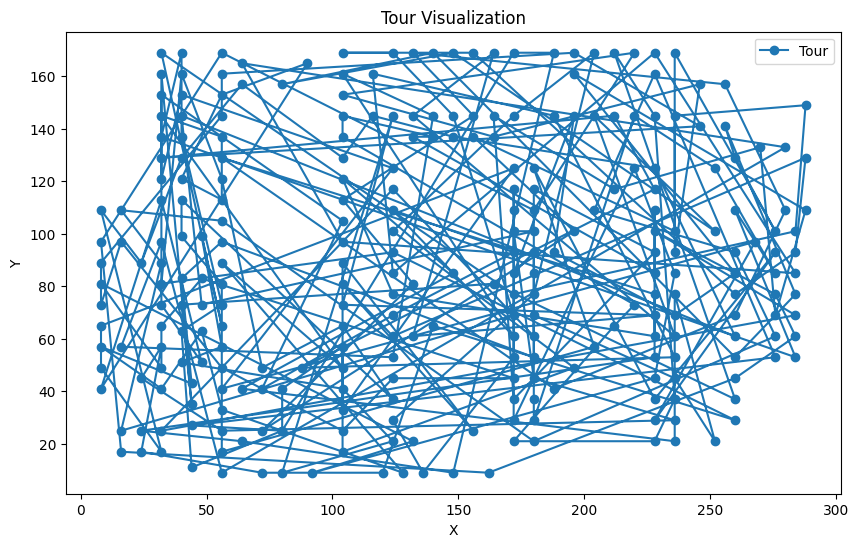

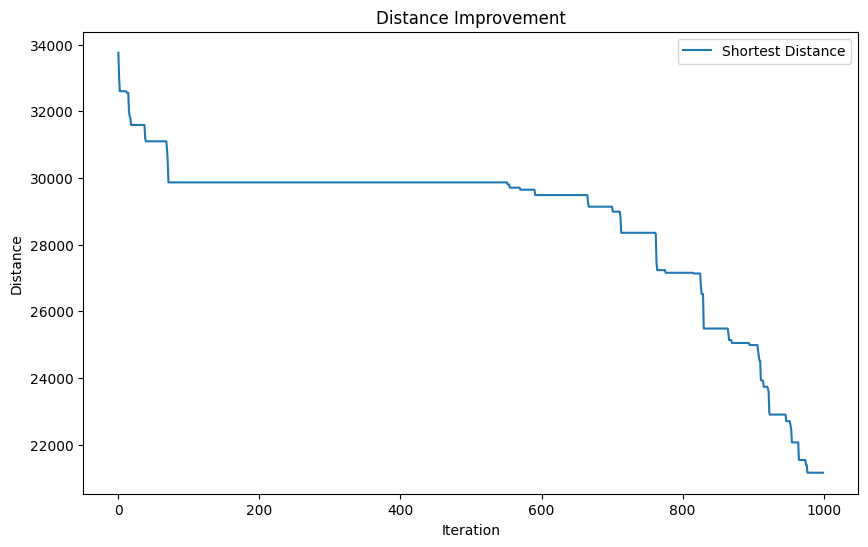

In [54]:
# Function to plot the tour
def plot_tour(coords, tour):
    tour_coords = coords[tour + [tour[0]]]  # Close the loop
    plt.figure(figsize=(10, 6))
    plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'o-', label='Tour')
    plt.title('Tour Visualization')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Function to plot distances improvement over iterations
def plot_distances(distances):
    plt.figure(figsize=(10, 6))
    plt.plot(distances, label='Shortest Distance')
    plt.title('Distance Improvement')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()

# Example Execution
file_path = 'a280.tsp.txt'  # Change this to eil51.tsp.txt or pcb442.tsp.txt
coords = read_tsp(file_path)

# Run Simulated Annealing
initial_temp = 10000
cooling_rate = 0.995
max_iterations = 1000
markov_chain_length = 100

best_tour, shortest_distance, distances = simulated_annealing(coords, initial_temp, cooling_rate, max_iterations, markov_chain_length)

# Plot the results
print(f'Shortest Distance: {shortest_distance}')
plot_tour(coords, best_tour)
plot_distances(distances)

---
**Plot the Tour for eil51.tsp and pcb442.tsp**

Shortest Distance for eil51.tsp.txt: 1180.1023777977407
Shortest Distance for pcb442.tsp.txt: 131082.608363184


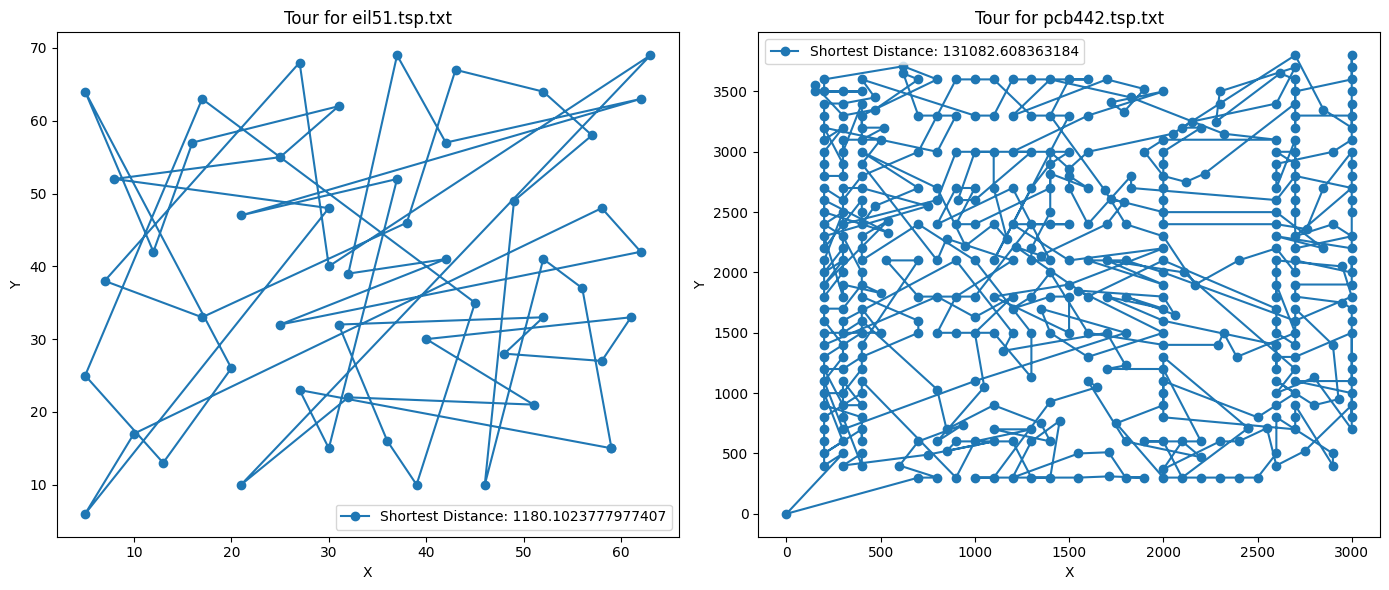

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

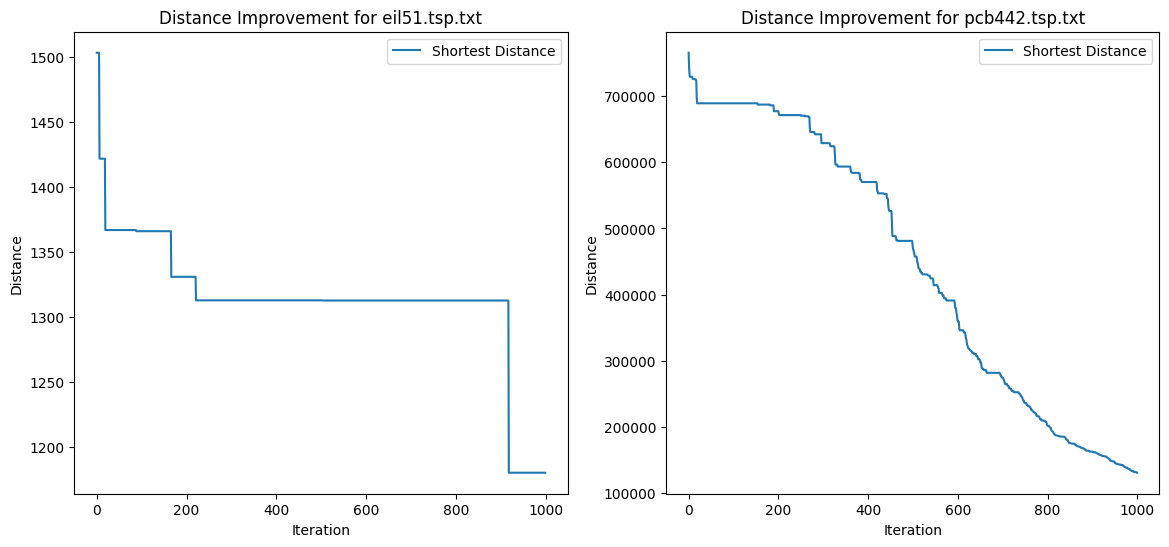

In [55]:
# File paths for the two datasets
file_path1 = 'eil51.tsp.txt'  # Dataset 1
file_path2 = 'pcb442.tsp.txt'  # Dataset 2

# Parameters for Simulated Annealing
initial_temp = 10000
cooling_rate = 0.995
max_iterations = 1000
markov_chain_length = 100

# Function to run Simulated Annealing and return results
def run_sa_for_file(file_path):
    coords = read_tsp(file_path)
    best_tour, shortest_distance, distances = simulated_annealing(coords, initial_temp, cooling_rate, max_iterations, markov_chain_length)
    return coords, best_tour, shortest_distance, distances

# Run Simulated Annealing for both datasets
coords1, best_tour1, shortest_distance1, distances1 = run_sa_for_file(file_path1)
coords2, best_tour2, shortest_distance2, distances2 = run_sa_for_file(file_path2)

# Print best distances for both datasets
print(f"Shortest Distance for {file_path1}: {shortest_distance1}")
print(f"Shortest Distance for {file_path2}: {shortest_distance2}")

# Plot tours for both datasets
plt.figure(figsize=(14, 6))

# Dataset 1 Tour
plt.subplot(1, 2, 1)
tour_coords1 = coords1[best_tour1 + [best_tour1[0]]]  # Close the loop
plt.plot(tour_coords1[:, 0], tour_coords1[:, 1], 'o-', label=f"Shortest Distance: {shortest_distance1}")
plt.title(f'Tour for {file_path1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Dataset 2 Tour
plt.subplot(1, 2, 2)
tour_coords2 = coords2[best_tour2 + [best_tour2[0]]]  # Close the loop
plt.plot(tour_coords2[:, 0], tour_coords2[:, 1], 'o-', label=f"Shortest Distance: {shortest_distance2}")
plt.title(f'Tour for {file_path2}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

# Plot distance improvements for both datasets
plt.figure(figsize=(14, 6))

# Dataset 1 Distances
plt.subplot(1, 2, 1)
plt.plot(distances1, label='Shortest Distance')
plt.title(f'Distance Improvement for {file_path1}')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.legend()

# Dataset 2 Distances
plt.subplot(1, 2, 2)
plt.plot(distances2, label='Shortest Distance')
plt.title(f'Distance Improvement for {file_path2}')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.legend()

plt.tight_layout

---
**Compare Different Cooling Schedules and Their Effects on Convergence**

In [56]:
# Different cooling schedules
def cooling_schedule_exponential(temperature, cooling_rate, iteration):
    return temperature * cooling_rate

def cooling_schedule_linear(temperature, cooling_rate, iteration):
    return max(temperature - cooling_rate, 0)

def cooling_schedule_logarithmic(temperature, cooling_rate, iteration):
    return cooling_rate / (np.log(iteration + 2))

# Modify simulated annealing to accept a cooling function
def simulated_annealing(coords, initial_temp, cooling_schedule, cooling_rate, max_iterations, markov_chain_length):
    dist_matrix = compute_distance_matrix(coords)
    n = len(coords)
    current_tour = list(range(n))
    random.shuffle(current_tour)
    current_distance = total_distance(current_tour, dist_matrix)
    best_tour = current_tour.copy()
    shortest_distance = current_distance

    temperature = initial_temp
    distances = []

    for iteration in range(max_iterations):
        for _ in range(markov_chain_length):
            i, j = sorted(random.sample(range(n), 2))
            new_tour = current_tour[:i] + current_tour[i:j + 1][::-1] + current_tour[j + 1:]
            new_distance = total_distance(new_tour, dist_matrix)

            if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temperature):
                current_tour = new_tour
                current_distance = new_distance

            if current_distance < shortest_distance:
                best_tour = current_tour
                shortest_distance = current_distance

        distances.append(shortest_distance)

        # Use the cooling schedule function
        temperature = cooling_schedule(temperature, cooling_rate, iteration)
        if temperature < 1e-8:
            break

    return best_tour, shortest_distance, distances

Shortest Distance (Exponential Cooling): 20393.028493917667
Shortest Distance (Linear Cooling): 30781.64319617939
Shortest Distance (Logarithmic Cooling): 24636.4481999141


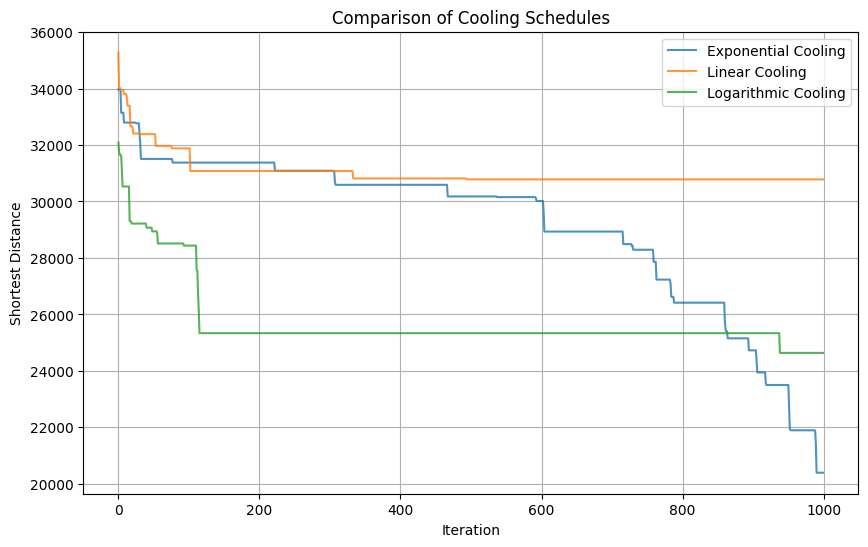

In [57]:
# Parameters for Simulated Annealing
file_path = 'a280.tsp.txt'  # Dataset path
coords = read_tsp(file_path)

initial_temp = 10000
cooling_rate_exponential = 0.995  # For exponential
cooling_rate_linear = 5          # For linear
cooling_rate_logarithmic = 1000  # For logarithmic
max_iterations = 1000
markov_chain_length = 100

# Run Simulated Annealing with Exponential Cooling
best_tour_exp, shortest_distance_exp, distances_exp = simulated_annealing(
    coords, initial_temp, cooling_schedule_exponential, cooling_rate_exponential, max_iterations, markov_chain_length
)

# Run Simulated Annealing with Linear Cooling
best_tour_lin, shortest_distance_lin, distances_lin = simulated_annealing(
    coords, initial_temp, cooling_schedule_linear, cooling_rate_linear, max_iterations, markov_chain_length
)

# Run Simulated Annealing with Logarithmic Cooling
best_tour_log, shortest_distance_log, distances_log = simulated_annealing(
    coords, initial_temp, cooling_schedule_logarithmic, cooling_rate_logarithmic, max_iterations, markov_chain_length
)

# Print results
print(f"Shortest Distance (Exponential Cooling): {shortest_distance_exp}")
print(f"Shortest Distance (Linear Cooling): {shortest_distance_lin}")
print(f"Shortest Distance (Logarithmic Cooling): {shortest_distance_log}")

# Plot comparison of distances over iterations
plt.figure(figsize=(10, 6))

plt.plot(distances_exp, label="Exponential Cooling", alpha=0.8)
plt.plot(distances_lin, label="Linear Cooling", alpha=0.8)
plt.plot(distances_log, label="Logarithmic Cooling", alpha=0.8)

plt.title("Comparison of Cooling Schedules")
plt.xlabel("Iteration")
plt.ylabel("Shortest Distance")
plt.legend()
plt.grid()
plt.show()

---
**Compare Different Markov Chain’s Lengths' Effects on Convergence**

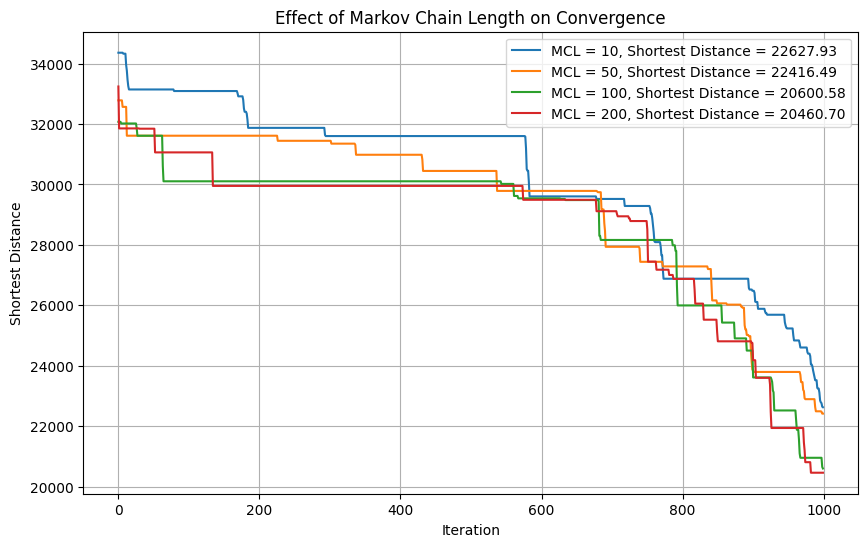

In [58]:
# Parameters for Simulated Annealing
file_path = 'a280.tsp.txt'  # Dataset
coords = read_tsp(file_path)

initial_temp = 10000
cooling_rate = 0.995
max_iterations = 1000

# Define different Markov Chain lengths
markov_chain_lengths = [10, 50, 100, 200]

# Run Simulated Annealing for different MCL
results = {}
for mcl in markov_chain_lengths:
    best_tour, shortest_distance, distances = simulated_annealing(
        coords, initial_temp, cooling_schedule_exponential, cooling_rate, max_iterations, mcl
    )
    results[mcl] = (shortest_distance, distances)

# Plot comparison of convergence for different MCL
plt.figure(figsize=(10, 6))
for mcl, (shortest_distance, distances) in results.items():
    plt.plot(distances, label=f"MCL = {mcl}, Shortest Distance = {shortest_distance:.2f}")

plt.title("Effect of Markov Chain Length on Convergence")
plt.xlabel("Iteration")
plt.ylabel("Shortest Distance")
plt.legend()
plt.grid()
plt.show()